# **Regressão**

## **Import's**

In [455]:
# Importando biblioteca do YahooFinance
!pip install yfinance
import yfinance as yF

# Manipulação de dados
import pandas as pd
import numpy as np

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline

# Importando os pacotes para o modelo preditivo
# from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

# Importando os modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
!pip install xgboost
from xgboost import XGBRegressor

# Importando métricas
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Formatando valores com duas cassas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')


In [456]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITUB3.SA")

# Opções de períodos
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-13 00:00:00-03:00,17.53,17.62,17.05,17.28,619751,0.00,0.00
2021-01-14 00:00:00-03:00,17.38,17.77,17.23,17.66,468608,0.00,0.00
2021-01-15 00:00:00-03:00,17.39,17.50,17.09,17.15,503731,0.00,0.00
2021-01-18 00:00:00-03:00,17.20,17.42,17.04,17.10,352136,0.00,0.00
2021-01-19 00:00:00-03:00,17.26,17.35,16.80,16.96,606268,0.00,0.00


In [457]:
# Retirando o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-13 00:00:00-03:00,17.53,17.62,17.05,17.28,619751,0.00,0.00
1,2021-01-14 00:00:00-03:00,17.38,17.77,17.23,17.66,468608,0.00,0.00
2,2021-01-15 00:00:00-03:00,17.39,17.50,17.09,17.15,503731,0.00,0.00
3,2021-01-18 00:00:00-03:00,17.20,17.42,17.04,17.10,352136,0.00,0.00
4,2021-01-19 00:00:00-03:00,17.26,17.35,16.80,16.96,606268,0.00,0.00


In [458]:
# Olhando as ultimas linhas
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1242,2026-01-07 00:00:00-03:00,37.40,37.40,36.67,36.70,1201500,0.00,0.00
1243,2026-01-08 00:00:00-03:00,36.70,37.18,36.68,37.12,1228900,0.00,0.00
1244,2026-01-09 00:00:00-03:00,37.26,37.44,36.95,37.05,954800,0.00,0.00
1245,2026-01-12 00:00:00-03:00,37.09,37.09,36.71,36.86,872900,0.00,0.00
1246,2026-01-13 00:00:00-03:00,36.80,36.80,36.31,36.31,937200,0.00,0.00


In [459]:
# Retirando a ultima linha, pois o "pregão" ainda não fechou
dados.drop(dados.tail(1).index,inplace=True)
dados.tail

<bound method NDFrame.tail of                           Date  Open  High   Low  Close   Volume  Dividends  \
0    2021-01-13 00:00:00-03:00 17.53 17.62 17.05  17.28   619751       0.00   
1    2021-01-14 00:00:00-03:00 17.38 17.77 17.23  17.66   468608       0.00   
2    2021-01-15 00:00:00-03:00 17.39 17.50 17.09  17.15   503731       0.00   
3    2021-01-18 00:00:00-03:00 17.20 17.42 17.04  17.10   352136       0.00   
4    2021-01-19 00:00:00-03:00 17.26 17.35 16.80  16.96   606268       0.00   
...                        ...   ...   ...   ...    ...      ...        ...   
1241 2026-01-06 00:00:00-03:00 37.27 37.77 37.17  37.43   966400       0.00   
1242 2026-01-07 00:00:00-03:00 37.40 37.40 36.67  36.70  1201500       0.00   
1243 2026-01-08 00:00:00-03:00 36.70 37.18 36.68  37.12  1228900       0.00   
1244 2026-01-09 00:00:00-03:00 37.26 37.44 36.95  37.05   954800       0.00   
1245 2026-01-12 00:00:00-03:00 37.09 37.09 36.71  36.86   872900       0.00   

      Stock Splits  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00  
...            ...  
1241          0.00  
1242          0.00  
1243          0.00  
1244          0.00  
1245          0.00  

[1246 rows x 8 columns]>

In [460]:
# Excluindo as colunas que não iremos utilizar e renomeando
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2021-01-13 00:00:00-03:00,17.53,17.62,17.05,17.28,619751
1,2021-01-14 00:00:00-03:00,17.38,17.77,17.23,17.66,468608
2,2021-01-15 00:00:00-03:00,17.39,17.50,17.09,17.15,503731
3,2021-01-18 00:00:00-03:00,17.20,17.42,17.04,17.10,352136
4,2021-01-19 00:00:00-03:00,17.26,17.35,16.80,16.96,606268


In [461]:
# Olhando o range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data: ', dados['Data'].max())

Menor data:  2021-01-13 00:00:00-03:00
Maior data:  2026-01-12 00:00:00-03:00


In [462]:
# Observando os dados referente a ultima data do conjunto de dados
display(dados.loc[dados.index.max()])

,1245
Data,2026-01-12 00:00:00-03:00
Abertura,37.09
Maximo,37.09
Minimo,36.71
Fechamento,36.86
Volume,872900


In [463]:
# Tipos de Dados
dados.dtypes

,0
Data,"datetime64[ns, America/Sao_Paulo]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64


In [464]:
#Volume dos dados
dados.shape

(1246, 6)

In [465]:
# Sumário
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1246.00,1246.00,1246.00,1246.00,1246.00
mean,19.35,19.54,19.16,19.35,808928.24
std,5.87,5.91,5.84,5.88,632761.83
min,12.15,12.26,12.08,12.15,122364.00
25%,14.79,14.99,14.64,14.81,460592.00
50%,16.99,17.17,16.81,16.97,643827.00
75%,22.36,22.60,22.26,22.38,962115.00
max,37.40,37.77,37.17,37.43,11101927.00


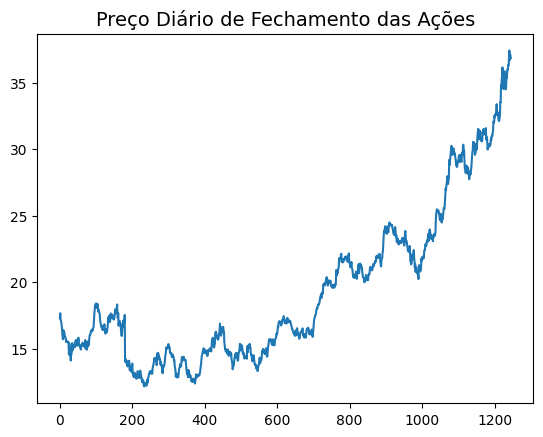

In [466]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [467]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2021-01-13 00:00:00-03:00,17.53,17.62,17.05,17.28,619751
1,2021-01-14 00:00:00-03:00,17.38,17.77,17.23,17.66,468608
2,2021-01-15 00:00:00-03:00,17.39,17.50,17.09,17.15,503731
3,2021-01-18 00:00:00-03:00,17.20,17.42,17.04,17.10,352136
4,2021-01-19 00:00:00-03:00,17.26,17.35,16.80,16.96,606268


# **Feature Engineering**

In [468]:
# Criando novos campos de Média Movel com 5, 14 e 21 dias
# Aqui ainda inclui o preço atual, mas não tem problema pois vamos usar esses dados para prever o amanhã
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [469]:
dados.head(25)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2021-01-13 00:00:00-03:00,17.53,17.62,17.05,17.28,619751,NaN,NaN,NaN
1,2021-01-14 00:00:00-03:00,17.38,17.77,17.23,17.66,468608,NaN,NaN,NaN
2,2021-01-15 00:00:00-03:00,17.39,17.50,17.09,17.15,503731,NaN,NaN,NaN
3,2021-01-18 00:00:00-03:00,17.20,17.42,17.04,17.10,352136,NaN,NaN,NaN
4,2021-01-19 00:00:00-03:00,17.26,17.35,16.80,16.96,606268,17.23,NaN,NaN
5,2021-01-20 00:00:00-03:00,16.99,17.03,16.59,16.70,343978,17.11,NaN,NaN
6,2021-01-21 00:00:00-03:00,16.69,16.75,16.36,16.44,420003,16.87,NaN,NaN
7,2021-01-22 00:00:00-03:00,16.30,16.35,16.01,16.05,959764,16.65,NaN,NaN
8,2021-01-26 00:00:00-03:00,15.99,16.36,15.61,15.71,1014488,16.37,NaN,NaN
9,2021-01-27 00:00:00-03:00,15.68,15.97,15.52,15.71,659406,16.12,NaN,NaN


# **Criando variavel target**

In [470]:
# Criando a variável alvo deslocada
# Criamos uma coluna nova com o preço de amanhã trazido para a linha de hoje
dados['Target'] = dados['Fechamento'].shift(-1)

In [471]:
# Removendo os NaN
porcentagem_nan_coluna = (dados.isnull().sum() / len(dados)) * 100

print("Análise por Coluna (Antes da remoção)")
print(porcentagem_nan_coluna)

total_linhas_antes = len(dados)

dados.dropna(inplace=True)

Análise por Coluna (Antes da remoção)
Data         0.00
Abertura     0.00
Maximo       0.00
Minimo       0.00
Fechamento   0.00
Volume       0.00
mm5d         0.32
mm14d        1.04
mm21d        1.61
Target       0.08
dtype: float64


In [472]:
dados.shape

(1225, 10)

# **Separando em X e y**

In [473]:
X = dados.drop(columns=['Data', 'Target'])
# y preço de amanhã
y = dados['Target']

In [474]:
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

Formato de X: (1225, 8)
Formato de y: (1225,)


In [475]:
X.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
20,15.59,15.68,15.41,15.50,390658,15.57,15.83,16.23
21,15.50,15.64,15.31,15.48,437451,15.51,15.79,16.15
22,15.48,15.61,15.39,15.52,651135,15.52,15.78,16.05
23,15.52,15.74,15.42,15.51,1002025,15.50,15.76,15.97
24,15.51,15.64,15.31,15.39,450027,15.48,15.69,15.89


In [476]:
X.tail()

,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
1240,36.35,37.25,36.28,36.92,1276800,36.32,35.59,35.43
1241,37.27,37.77,37.17,37.43,966400,36.59,35.76,35.53
1242,37.40,37.40,36.67,36.70,1201500,36.74,35.86,35.59
1243,36.70,37.18,36.68,37.12,1228900,36.90,35.95,35.63
1244,37.26,37.44,36.95,37.05,954800,37.04,36.12,35.74


In [477]:
y.head()

,Target
20,15.48
21,15.52
22,15.51
23,15.39
24,14.54


In [478]:
y.tail()

,Target
1240,37.43
1241,36.70
1242,37.12
1243,37.05
1244,36.86


# **Separando conjunto de Teste, Treino**

In [479]:
# Separação Treino / Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=False # Mantém a ordem cronológica, evitando embaralhar para evitar que o modelo possa usar o preço de amanhã para tentar prever o preço de ontem
)

print("Tamanho treino:", X_train.shape[0])
print("Tamanho teste:", X_test.shape[0])
print("\nX (Dados que o modelo vê - Hoje):")
print(X.head(1))
print("\ny (O que ele tem que prever - Amanhã):")
print(y.head(1))


Tamanho treino: 980
Tamanho teste: 245

X (Dados que o modelo vê - Hoje):
    Abertura  Maximo  Minimo  Fechamento  Volume  mm5d  mm14d  mm21d
20     15.59   15.68   15.41       15.50  390658 15.57  15.83  16.23

y (O que ele tem que prever - Amanhã):
20   15.48
Name: Target, dtype: float64


# **Definindo modelos e hiperparâmetros**

In [480]:
# Dicionário de pipelines (5 modelos)
pipelines = {
    "ridge_regression": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", Ridge(random_state=42))
    ]),
    "knn": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", KNeighborsRegressor())
    ]),
    "svr_rbf": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", SVR(kernel="rbf"))
    ]),
    "random_forest": Pipeline([
        ("model", RandomForestRegressor(random_state=42))
    ]),
    "xgboost": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", XGBRegressor(objective='reg:squarederror', random_state=42))
    ]),
}

# Grades de hiperparâmetros
param_grids = {
    "ridge_regression": {
        "model__alpha": [0.1, 1.0, 10.0, 100.0]  # Alpha é o parâmetro de regularização do Ridge
    },
    "knn": {
        "model__n_neighbors": [3, 5, 7, 11],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]
    },
    "svr_rbf": {
        "model__C": [0.1, 1, 10],
        "model__epsilon": [0.1, 0.01, 0.001], # Epsilon é específico para SVR (margem de erro)
        "model__gamma": ["scale", "auto"]
    },
    "random_forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 5, 10],
        "model__min_samples_split": [2, 5]
    },
    "xgboost": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.1],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.8, 1.0]
    },
}

# **Validação cruzada com GridSearchCV**

In [481]:
tscv = TimeSeriesSplit(n_splits=5)

resultados = []

for nome, pipe in pipelines.items():
    print(f"Treinando e validando modelo: {nome}")

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[nome],
        cv=tscv,  # Usamos o divisor temporal aqui
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )


    grid.fit(X_train, y_train)
    melhor_modelo = grid.best_estimator_

    y_pred = melhor_modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nome,
        "RMSE": rmse,
        "R2": r2,
        "Melhores Params": grid.best_params_
    })

# Tabela com resultados
df_resultados = pd.DataFrame(resultados)

# Ordenando pelo menor erro (RMSE)
df_resultados = df_resultados.sort_values(by="RMSE", ascending=True)

print(df_resultados[['Modelo', 'RMSE', 'R2']])

Treinando e validando modelo: ridge_regression
Treinando e validando modelo: knn
Treinando e validando modelo: svr_rbf
Treinando e validando modelo: random_forest
Treinando e validando modelo: xgboost
             Modelo  RMSE    R2
0  ridge_regression  0.37  0.99
2           svr_rbf  4.13 -0.20
3     random_forest  6.12 -1.63
1               knn  6.16 -1.66
4           xgboost  6.25 -1.74


# **Escolhendo o melhor modelo da validação cruzada com MSE**

In [482]:
melhor_cenario = df_resultados.iloc[0]

print("Campeão")
print(f"Modelo: {melhor_cenario['Modelo']}")
print(f"RMSE (Erro Médio): {melhor_cenario['RMSE']:.4f}")
print(f"R2 (Explicação): {melhor_cenario['R2']:.4f}")
print("\nHiperparâmetros usados:")
print(melhor_cenario['Melhores Params'])

Campeão
Modelo: ridge_regression
RMSE (Erro Médio): 0.3714
R2 (Explicação): 0.9903

Hiperparâmetros usados:
{'model__alpha': 0.1}


Recuperando o campeão: ridge_regression


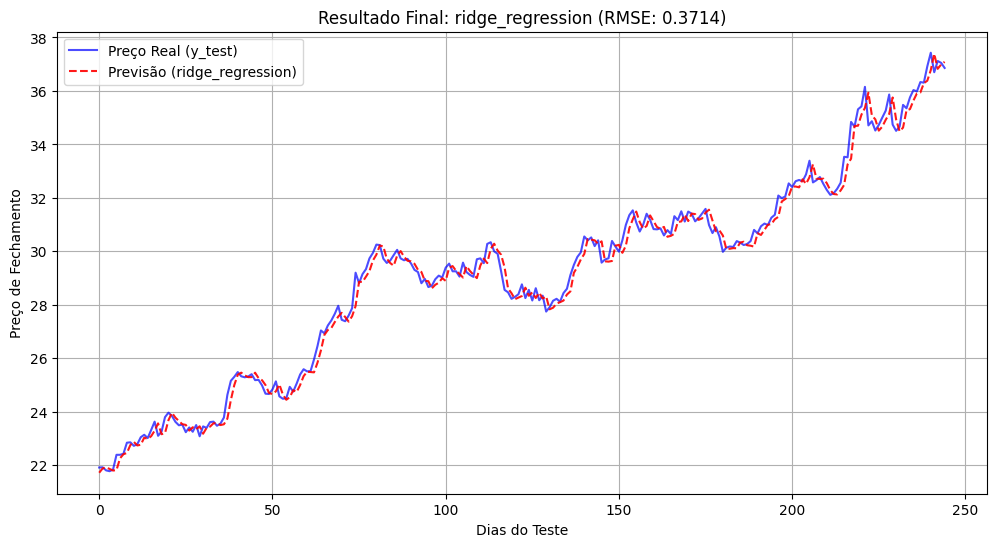

In [483]:
nome_campeao = df_resultados.iloc[0]['Modelo']
params_campeao = df_resultados.iloc[0]['Melhores Params']

print(f"Recuperando o campeão: {nome_campeao}")

#Pegando o pipeline virgem desse modelo
modelo_final = pipelines[nome_campeao]

# Aplicando os melhores parâmetros que o GridSearch descobriu
modelo_final.set_params(**params_campeao)

# Treina o modelo final no X_train completo
modelo_final.fit(X_train, y_train)

# Fazendo a previsão final para o gráfico
y_pred_final = modelo_final.predict(X_test)


plt.figure(figsize=(12, 6))
# Resetando o index para o gráfico ficar alinhado de 0 a N
plt.plot(y_test.values, label='Preço Real (y_test)', color='blue', alpha=0.7)
plt.plot(y_pred_final, label=f'Previsão ({nome_campeao})', color='red', linestyle='--', alpha=0.9)
plt.title(f"Resultado Final: {nome_campeao} (RMSE: {df_resultados.iloc[0]['RMSE']:.4f})")
plt.xlabel("Dias do Teste")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.show()